In [168]:
import tensorflow.keras.backend as K
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import itertools
import random

In [ ]:
inputs = keras.Input(shape=(784,))
dense = keras.layers.Dense(64, activation="relu")(inputs)
x = keras.layers.Dense(64, activation="relu")(dense)
outputs = keras.layers.Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [148]:
def build_model():
    """ This function builds a functional model"""
    

    inputs =  keras.Input(shape=(28,28),name="input_layer")
    x =  keras.layers.Flatten()(inputs)
    
    x =  keras.layers.Dense(32,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)

    x =  keras.layers.Dense(64,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(128,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(64,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(32,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)

    outputs =  keras.layers.Dense(10,activation="softmax")(x)


    model =  keras.Model(inputs=inputs,outputs=outputs,name="mnist_model")
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.RMSprop(),metrics=["accuracy"],)
    
    return model

In [146]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

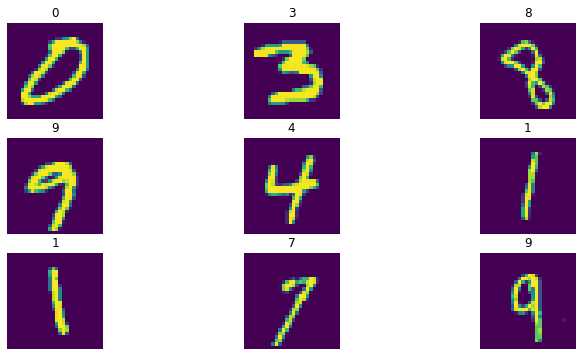

In [147]:
plt.figure(figsize=(12,6))
samples = np.random.randint(0,len(x_train),9)
for i in range(len(samples)):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[samples[i]],interpolation='nearest')
    plt.title(str(y_train[samples[i]]))
    plt.axis("off")

In [149]:
model = build_model()

In [141]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [150]:
history = model.fit(x_train, y_train, batch_size=32, epochs=2, validation_split=0.2)

Epoch 1/2
1500/1500 [==============================] - 5s 3ms/step - loss: 0.9764 - accuracy: 0.6981 - val_loss: 0.2767 - val_accuracy: 0.9187
Epoch 2/2
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5464 - accuracy: 0.8504 - val_loss: 0.2369 - val_accuracy: 0.9333


In [151]:
# keras.utils.plot_model(model,"model.png",show_shapes=True)

In [152]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.2488 - accuracy: 0.9294
Test loss: 0.24878662824630737
Test accuracy: 0.9294000267982483


In [159]:
def build_model():

    encoder_input =  keras.Input(shape=(28,28,1),name="img")

    x =  keras.layers.Conv2D(16, 3,activation="relu")(encoder_input)
    x = keras.layers.Conv2D(32, 3, activation="relu")(x)
    x = keras.layers.MaxPooling2D(3)(x)
    x = keras.layers.Conv2D(32, 3, activation="relu")(x)
    x = keras.layers.Conv2D(16, 3, activation="relu")(x)
    encoder_output =  keras.layers.GlobalMaxPooling2D()(x)
    
    encoder = keras.Model(encoder_input, encoder_output, name="encoder")
    
    # We are building an autoencoder now     
    x = keras.layers.Reshape((4, 4, 1))(encoder_output)
    x = keras.layers.Conv2DTranspose(16, 3, activation="relu")(x)
    x = keras.layers.Conv2DTranspose(32, 3, activation="relu")(x)
    x = keras.layers.UpSampling2D(3)(x)
    x = keras.layers.Conv2DTranspose(16, 3, activation="relu")(x)
    decoder_output = keras.layers.Conv2DTranspose(1, 3, activation="relu")(x)

    autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
    return encoder,autoencoder

In [160]:
encoder,autoencoder =  build_model()

In [161]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 16)                0   

In [162]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_2 (Glob (None, 16)                

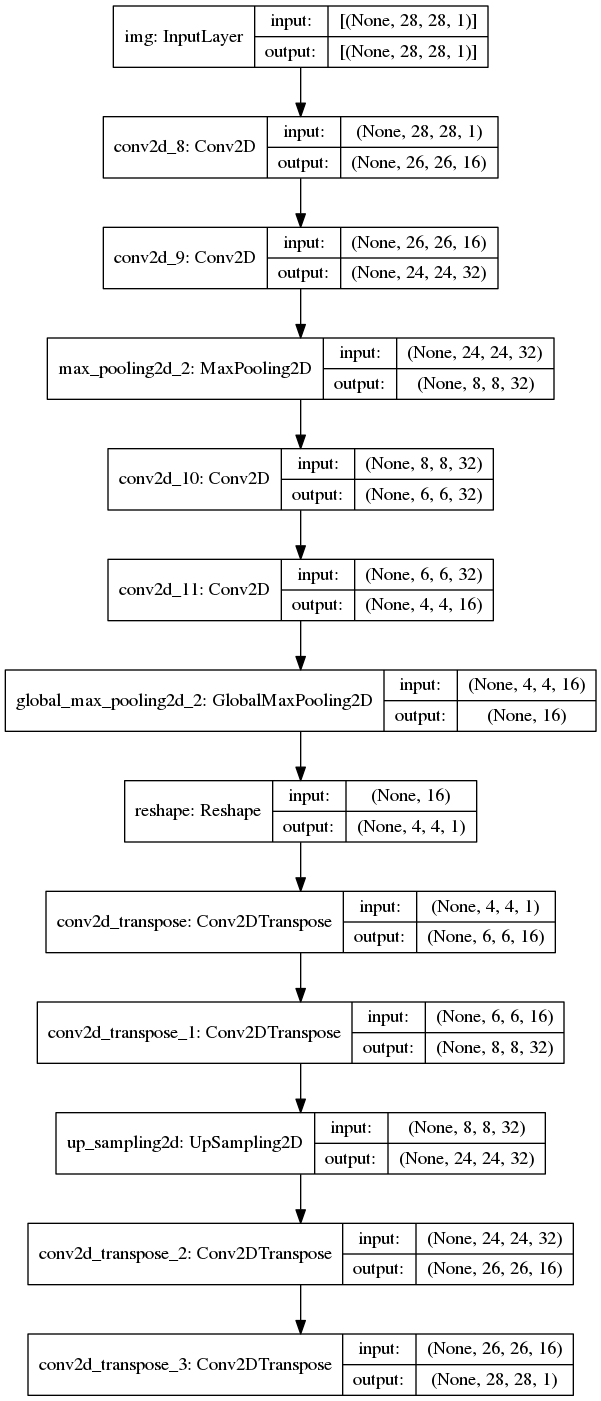

In [164]:
keras.utils.plot_model(autoencoder,'autoencoder.png',show_shapes=True)

In [231]:
def build_multi_model():
    """ This function builds a functional model"""
    

    inputs =  keras.Input(shape=(784,),name="input_layer")
    
    x =  keras.layers.Dense(32,activation="relu")(inputs)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)

    x =  keras.layers.Dense(64,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(128,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(64,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)
    
    x =  keras.layers.Dense(32,activation="relu")(x)
    x =  keras.layers.BatchNormalization()(x)
    x =  keras.layers.Dropout(0.3)(x)

    outputs_identity =  keras.layers.Dense(10,activation="softmax",name="department")(x)
    
    outputs_gender =  keras.layers.Dense(2,activation="sigmoid",name="gender")(x)


    model =  keras.Model(inputs=inputs,outputs=[outputs_identity, outputs_gender],name="mnist_model")
    #     loss=["sparse_categorical_crossentropy",keras.losses.BinaryCrossentropy()], 
    model.compile(
        loss=["sparse_categorical_crossentropy","sparse_categorical_crossentropy"],
        optimizer=keras.optimizers.RMSprop(1e-3)
        )
    
    return model

In [236]:
# Here we are generating fake data
X,y =  make_classification(n_samples=100000, n_features=784,n_classes=10,n_clusters_per_class=4,n_informative=10)

In [237]:
y_2 = np.random.choice([0,1],len(y))  

In [238]:
model = build_multi_model()

In [211]:
# model.summary()

In [207]:
# keras.utils.plot_model(model,'multitask.png',show_shapes=True)

In [239]:
X  = X.astype("float32")

In [240]:
model.fit(x = X,y= {"department": y,"gender": y_2},epochs=2,batch_size=32)

Epoch 1/2
3125/3125 [==============================] - 9s 3ms/step - loss: 3.0116 - department_loss: 2.3005 - gender_loss: 0.7112
Epoch 2/2
3125/3125 [==============================] - 8s 3ms/step - loss: 2.8087 - department_loss: 2.1145 - gender_loss: 0.6942


In [227]:
from sklearn.datasets import make_multilabel_classification

X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)

In [228]:
y.shape

(1000, 3)